<font color='blue'>Привет! Поздравляю со вторым выполненным проектом. Он значительно объемнее первого. Меня зовут Алексей, я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда желательно доработать)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.

---
Апдейт после проверки: очень хороший проект, давай доведем до идеала.
    
Более подробно см. блок в конце.
</font>

<font color='Teal'>Привет! Спасибо за проверку и комметарии к проекту! Свои исправления оставлю сразу после твоих замечаний.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 30) # добавим количество отображаемых колонок 20 -> 30
pd.set_option('float_format', '{:,.1f}'.format) # для наглядности отображение Float: 11,200,000.0

# Настройка графиков
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (15, 3),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)

In [3]:
data = pd.read_csv('./datasets/real_estate_data.csv',sep='\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18307,17,"12,360,000.0",81.4,2018-09-11T00:00:00,3,3.4,4.0,31.8,2,NaN,False,False,9.8,nan,Санкт-Петербург,"21,724.0","3,512.0",0.0,nan,0.0,nan,4.0
965,15,"4,450,000.0",42.0,2018-11-01T00:00:00,1,nan,16.0,17.0,1,NaN,False,False,12.7,nan,Санкт-Петербург,"28,834.0","11,695.0",0.0,nan,1.0,54.0,74.0
6665,20,"4,820,000.0",57.1,2017-09-06T00:00:00,2,2.5,9.0,26.5,9,NaN,False,False,15.0,5.0,Санкт-Петербург,"33,306.0","11,616.0",0.0,nan,0.0,nan,209.0
3868,17,"3,950,000.0",46.0,2018-10-13T00:00:00,1,2.8,17.0,22.2,15,NaN,False,False,10.3,1.0,Сертолово,nan,nan,nan,nan,nan,nan,93.0
34,3,"3,290,000.0",33.0,2018-02-04T00:00:00,1,2.5,16.0,14.0,3,NaN,False,False,8.0,nan,Санкт-Петербург,"13,943.0","12,739.0",0.0,nan,0.0,nan,15.0


In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Соберем названия колонок с пропусками и без пропусков в разные списки

In [6]:
columns_list_na = [column for column in data.columns if data[column].isna().sum()!=0]
columns_list_without_na = [column for column in data.columns if data[column].isna().sum()==0]
print('Колонок с пропусками:',len(columns_list_na))
print('Колонок без пропусков:',len(columns_list_without_na))

Колонок с пропусками: 14
Колонок без пропусков: 8


Необходимо избавится от пропусков и заменить типы данных:

1. Всего 23699 записей

2. Пропуски (**жирным** явные пропуски, чекбокс - будут обработаны далее):
    - [x] **9195 ceiling_height — высота потолков (м)**
    - [x] **86 floors_total — всего этажей в доме**
    - [x] 1903 living_area — жилая площадь в квадратных метрах(м²) (оставлю пропуски)
    - [x] **20924  is_apartment — апартаменты (должен быть булев тип)**
    - [x] 2278 kitchen_area — площадь кухни в квадратных метрах (м²) (оставлю пропуски)
    - [x] **11519 balcony — число балконов**
    - [x] **49 locality_name — название населённого пункта** (оставлю пропуски)
    - [x] 5542 airports_nearest — расстояние до ближайшего аэропорта в метрах (м) (оставлю пропуски)
    - [x] 5519 cityCenters_nearest — расстояние до центра города (м) (оставлю пропуски)
    - [x] 5518 parks_around3000 — число парков в радиусе 3 км (оставлю пропуски)
    - [x] 15620 parks_nearest — расстояние до ближайшего парка (м) (оставлю пропуски)
    - [x] 5518 ponds_around3000 — число водоёмов в радиусе 3 км (оставлю пропуски)
    - [x] 14589 ponds_nearest — расстояние до ближайшего водоёма (м) (оставлю пропуски)
    - [x] 3181 days_exposition — сколько дней было размещено объявление (от публикации до снятия) (оставлю пропуски)

3. Некорректныетипы данных:
    - [x] first_day_exposition — дата публикации -> datetime
    - [x] floors_total — всего этажей в доме -> int64
    - [x] is_apartment — апартаменты (булев тип) -> bool
    - [x] balcony — число балконов -> int64
    - [ ] parks_around3000 — число парков в радиусе 3 км -> int64 (оставлю float64)
    - [ ] ponds_around3000 — число водоёмов в радиусе 3 км -> int64 (оставлю float64)
    - [ ] days_exposition — сколько дней было размещено объявление (от публикации до снятия) -> int64 (оставлю float64)

<font color='green'>Данные загружены и подробно изучены. Применены необходимые методы первичного анализа, обозначены имеющиеся проблемы.</font>

### Шаг 2. Предобработка данных

Прости меня, человек, проверяющий это... Появилось время, и я немного упоролся на этом шаге. Скорее всего тут много лишних манипуляций, на которые не стоило тратить время. Но мне захотелось попробовать ¯\\_(**ツ**)_/¯

<font color='green'>Творчеству нельзя препятствовать ;)

#### Проверим наличие дублей

In [7]:
data.duplicated().sum()

0

***
#### 2.1. Обработка пропусков:

##### is_apartment

In [8]:
print('Всего пропусков:',data['is_apartment'].isna().sum())
print('Других значений:')
print(data['is_apartment'].value_counts())

Всего пропусков: 20924
Других значений:
False    2725
True       50
Name: is_apartment, dtype: int64


Очевидно, что апартаментов на рынке жилья очень маленький процент. Заменим пропуски на *False* и преобразуем к типу *bool*

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['is_apartment'].value_counts() # Проверка

False    23649
True        50
Name: is_apartment, dtype: int64

***
##### balcony

In [10]:
print('Всего пропусков:',data['balcony'].isna().sum())
print('Других значений:')
print(data['balcony'].value_counts())

Всего пропусков: 11519
Других значений:
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


Считаю, что пропуски соответствуют значению `0`. Заменяем их и выполняем преобразование к типу `int`

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].value_counts() # Проверка

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

<font color='green'>Здесь все очевидно хорошо.

***
##### ceiling_height

Оценим данные

count   14,504.0
mean         2.8
std          1.3
min          1.0
25%          2.5
50%          2.6
75%          2.8
max        100.0
Name: ceiling_height, dtype: float64


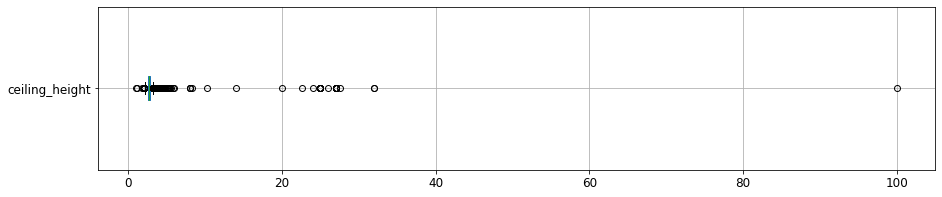

In [12]:
print(data['ceiling_height'].describe())
data.boxplot('ceiling_height',vert=False)
plt.show()

Очевидно, что 100 метров это перебор. Как и 1 метр. Посмотрим подробнее

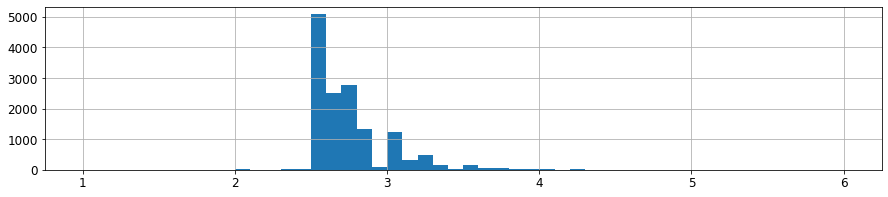

In [13]:
data['ceiling_height'].hist(bins=50,range=(1,6))
plt.show()

Значения <2 и >5 метров очевидные выбросы. Также имеются пропуски. Такие данные можно заменить медианой.

Количество выбросов: 39
Количество выбросов после замены: 0


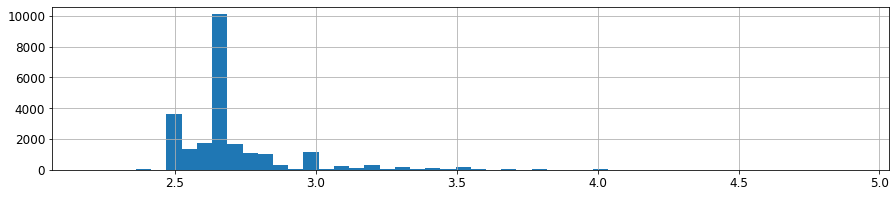

In [14]:
# пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# выбросы
print('Количество выбросов:',len(data.query('ceiling_height < 2 | ceiling_height > 5')))
data['ceiling_height'].where(data['ceiling_height']>2, 
                             data['ceiling_height'].median(),
                             inplace=True)
data['ceiling_height'].where(data['ceiling_height']<5, 
                             data['ceiling_height'].median(),
                             inplace=True)
print('Количество выбросов после замены:',len(data.query('ceiling_height < 2 | ceiling_height > 5')))
data['ceiling_height'].hist(bins=50)
plt.show()

<font color='green'>Дейтвительно, высота полотка - довольно типичный параметр, замена медианой подходит
    .

***
##### floors_total & floor

count   23,613.0
mean        10.7
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64


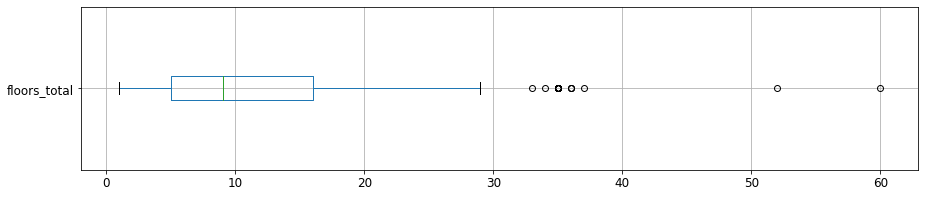

In [15]:
print(data['floors_total'].describe())
data.boxplot('floors_total',vert=False)
plt.show()

Неужели кто-то уже продает жилье в строящемся Лахта-центре??? Ох уж этот Газпром... :-)

In [16]:
data[data['floors_total'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,"3,800,000.0",45.5,2018-06-28T00:00:00,2,2.9,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,"67,763.0","49,488.0",2.0,342.0,3.0,614.0,166.0
16731,9,"3,978,000.0",40.0,2018-09-24T00:00:00,1,2.6,52.0,10.5,18,False,False,False,14.0,0,Санкт-Петербург,"20,728.0","12,978.0",1.0,793.0,0.0,nan,45.0


Вроде бы Лахта не в Кронштадте стоит... Сносим 60 этажей, ставим 6. И заодно 52 этажа опустим до 36

In [17]:
data['floors_total'] = data['floors_total'].replace(60, 6).replace(52, 36)

Посмотрим на данные с пропусками

In [18]:
print('Кол-во пропусков:',data[data['floors_total'].isna()].shape[0])
data[data['floors_total'].isna()].sample(5)

Кол-во пропусков: 86


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11389,3,"4,700,000.0",55.2,2016-06-23T00:00:00,1,2.6,nan,18.4,7,False,False,False,15.4,0,Санкт-Петербург,"35,234.0","14,674.0",0.0,nan,1.0,844.0,15.0
14717,4,"6,042,477.0",89.4,2017-03-17T00:00:00,3,2.6,nan,50.0,6,False,False,False,15.0,0,Санкт-Петербург,"22,041.0","17,369.0",0.0,nan,1.0,374.0,143.0
22542,5,"8,500,000.0",63.5,2017-05-24T00:00:00,2,2.8,nan,nan,3,False,False,False,nan,0,Санкт-Петербург,"51,340.0","15,363.0",0.0,nan,1.0,853.0,512.0
10662,12,"4,400,000.0",35.0,2017-06-15T00:00:00,1,2.6,nan,16.0,8,False,False,False,10.7,0,Санкт-Петербург,"9,412.0","13,723.0",2.0,676.0,1.0,"1,158.0",533.0
23658,6,"3,063,600.0",43.8,2016-11-28T00:00:00,1,2.7,nan,14.0,8,False,False,False,15.5,2,Санкт-Петербург,"8,426.0","12,082.0",2.0,24.0,1.0,271.0,246.0


Так как этих пропусков мало и придумать адекватное их заполнение не представляется возможным, считаю, что можно их удалить.

In [19]:
data.dropna(subset=['floors_total'], inplace=True)

<font color='green'>Согласен.

Проверим, на всякий случай, есть ли "карлсоны", живущие на крыше

In [20]:
len(data[data['floors_total'] < data['floor']])

0

Меняем на тип `int` и проверяем работу

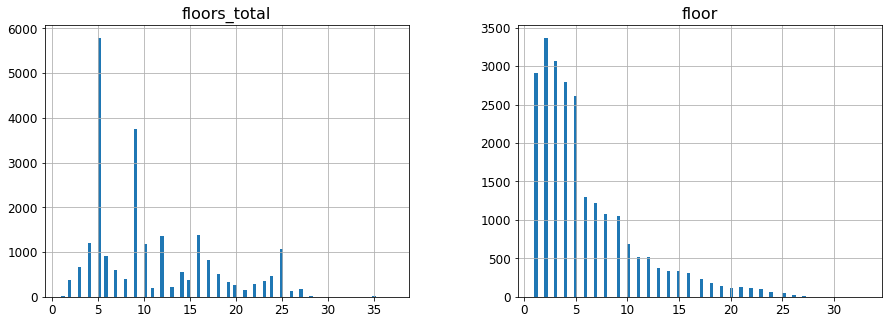

In [21]:
data['floors_total'] = data['floors_total'].astype('int')
data[['floors_total', 'floor']].hist(bins=100,figsize=(15,5))
plt.show()

***
##### living_area

Оцениваем

       living_area  total_area
count     21,743.0    23,613.0
mean          34.5        60.3
std           22.0        35.6
min            2.0        12.0
25%           18.6        40.0
50%           30.0        52.0
75%           42.3        69.8
max          409.7       900.0


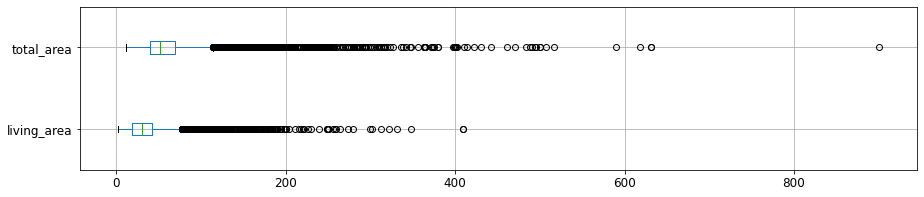

In [22]:
print(data[['living_area', 'total_area']].describe())
data.boxplot(['living_area', 'total_area'],vert=False)
plt.show()

Оценим слишком маленькие значения жилплощади

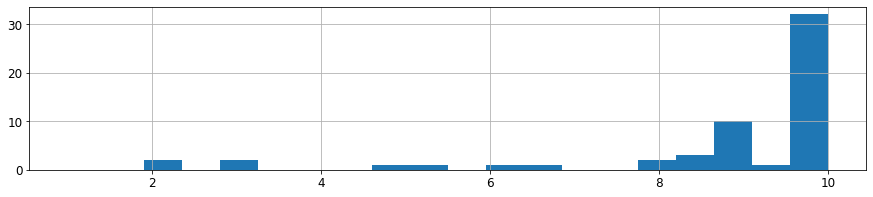

In [23]:
data['living_area'].hist(bins=20, range=(1,10))
plt.show()

In [24]:
data[data['living_area'] < 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,"4,440,000.0",41.0,2017-07-02T00:00:00,1,2.6,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,"19,272.0","13,073.0",0.0,nan,0.0,nan,216.0
13915,20,"6,350,000.0",52.0,2018-02-06T00:00:00,2,3.0,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,"32,453.0","6,521.0",0.0,nan,1.0,"1,012.0",91.0
16431,13,"3,799,000.0",31.0,2018-04-12T00:00:00,1,2.6,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,"32,177.0","4,826.0",1.0,430.0,0.0,nan,168.0
17582,11,"2,680,000.0",22.0,2018-08-11T00:00:00,0,2.6,25,5.0,8,False,True,False,nan,2,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,70.0
19251,19,"4,050,000.0",33.0,2018-10-15T00:00:00,1,2.5,22,6.5,21,False,False,False,18.0,0,Санкт-Петербург,"9,258.0","10,592.0",1.0,458.0,0.0,nan,44.0
21758,0,"2,330,000.0",23.0,2018-01-01T00:00:00,0,2.6,24,2.0,22,False,True,False,nan,0,посёлок Мурино,nan,nan,nan,nan,nan,nan,66.0
21943,15,"6,100,000.0",77.6,2019-02-28T00:00:00,4,2.5,9,5.4,1,False,False,False,9.8,0,Санкт-Петербург,"29,338.0","11,270.0",1.0,584.0,0.0,nan,33.0
23574,14,"64,990,000.0",139.0,2015-11-24T00:00:00,3,3.0,8,3.0,8,False,False,False,16.0,1,Санкт-Петербург,"33,255.0","5,975.0",1.0,630.0,3.0,100.0,280.0


Так и оставим. А теперь посмотрим, сколько стоит жилье больше $300 м^2$ жилой площади, вдруг это выбросы

In [25]:
data[data['living_area'] > 300]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,"49,950,000.0",483.9,2017-10-04T00:00:00,7,3.2,6,312.5,4,False,False,False,26.4,0,Санкт-Петербург,"23,079.0",945.0,3.0,461.0,3.0,22.0,391.0
4237,1,"50,000,000.0",517.0,2017-10-14T00:00:00,7,2.6,4,332.0,3,False,False,False,22.0,0,Санкт-Петербург,"22,835.0","1,847.0",2.0,477.0,2.0,540.0,nan
5358,20,"65,000,000.0",590.0,2019-02-14T00:00:00,15,3.5,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,"24,447.0","4,666.0",1.0,767.0,0.0,nan,14.0
8018,20,"84,000,000.0",507.0,2015-12-17T00:00:00,5,4.5,7,301.5,7,True,False,False,45.5,1,Санкт-Петербург,nan,"5,735.0",2.0,110.0,0.0,nan,"1,078.0"
12401,20,"91,500,000.0",495.0,2017-06-19T00:00:00,7,4.7,7,347.5,7,False,False,False,25.0,0,Санкт-Петербург,nan,"5,735.0",2.0,110.0,0.0,nan,14.0
12859,20,"140,000,000.0",631.2,2019-04-09T00:00:00,7,3.9,4,322.3,4,False,False,False,19.5,1,Санкт-Петербург,"25,707.0","4,972.0",0.0,nan,2.0,210.0,nan
19540,8,"420,000,000.0",900.0,2017-12-06T00:00:00,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,"30,706.0","7,877.0",0.0,nan,2.0,318.0,106.0


С данными всё хорошо, а мне не хорошо что-то... Лучше бы не смотрел :-). Проверим есть ли значения **living_area** > **total_area**

<font color='blue'>Ох, а я вот каждый день смотрю :)

In [26]:
len(data[data['living_area'] > data['total_area']])

0

Проверим теперь данные с пропусками **living_area** с помощью корреляционной матрицы и волшебного графика:

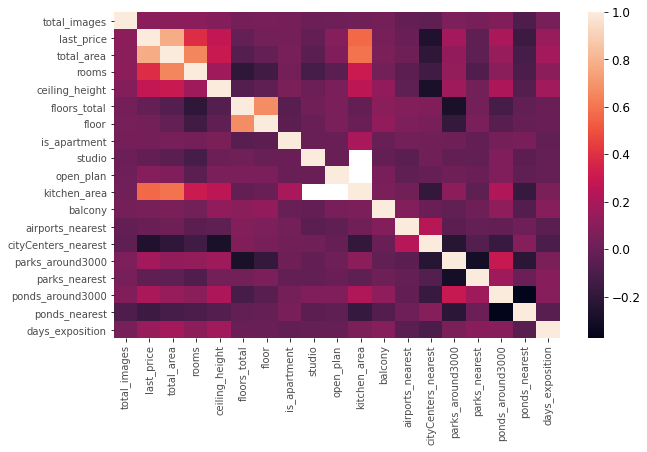

In [27]:
corr = data[data['living_area'].isna()].drop('living_area',axis=1).corr()
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.yticks(fontsize=10, alpha=.7)
plt.xticks(fontsize=10, alpha=.7)
plt.show()

По графику видно, что в записях, где имеются пропуски **living_area** имеется сильная взаимосвязь между **studio**,**open_plan** и	**kitchen_area**. Очевидно, что в квартирах-студиях так и должно быть. Оставим пропуски на местах.

<S><font color='brown'>Не совсем понятно, какую пользу мы извлекаем из графика. Предлагаю построить матрицу корреляции как раз для имеющихся даных, найти, от чего больше всего зависит жилая площадь и попробовать заполнить пропуски с опорой на этот столбец.
    То же самое касается кухни.

######  <font color='Teal'>Исправление</font>

Проверяем, что больше всего влияет на размер жилой площади

In [28]:
data.corr()['living_area'].sort_values(ascending=False).head()

living_area    1.0
total_area     0.9
rooms          0.8
last_price     0.6
kitchen_area   0.4
Name: living_area, dtype: float64

Наблюдаем очень сильную положительную корреляцию от общей площади. Напишем функцию, которая будет рассчитывать предполагаемый размер жилой площади:
- ищем среднее соотношение **total_area** к **living_area**
- подаем на вход **total_area**, на выходе предполагаемая **living_area**
- применяем функцию для пропусков **living_area**


In [29]:
ratio_tl = data['total_area'].mean() / data['living_area'].mean()
def fill_na_living_area(total):
    return total/ratio_tl

print('Кол-во пропусков до:',data[data['living_area'].isna()].shape[0])
data['living_area'].where(data['living_area'].isna()!=True,
                          data['total_area'].apply(fill_na_living_area),
                         inplace=True)
print('Кол-во пропусков после:',data[data['living_area'].isna()].shape[0])

Кол-во пропусков до: 1870
Кол-во пропусков после: 0


<font color='Teal'>PS:
На самом деле первоначально я делал именно так замену, но потом подумал, что менять эти данные будет не совсем корректно, т.к. пропуски возможно не просто так, а из-за того, что недвижимость может быть без жилой площади, например, офисы или что-то похожее.</font>


<b>UPD: <font color='green'>Ну, здесь мы все же имеем дело с квартирами. Отличная реализация.

***
##### kitchen_area

Оцениваем значения

count   21,382.0
mean        10.6
std          5.9
min          1.3
25%          7.0
50%          9.1
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64


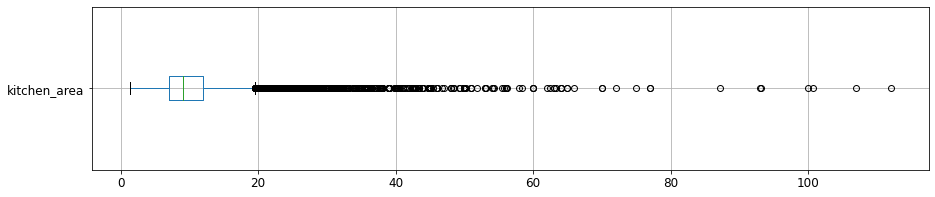

In [30]:
print(data['kitchen_area'].describe())
data.boxplot('kitchen_area',vert=False)
plt.show()

Проверим теперь данные с пропусками **kitchen_area** с помощью корреляционной матрицы и волшебного графика:

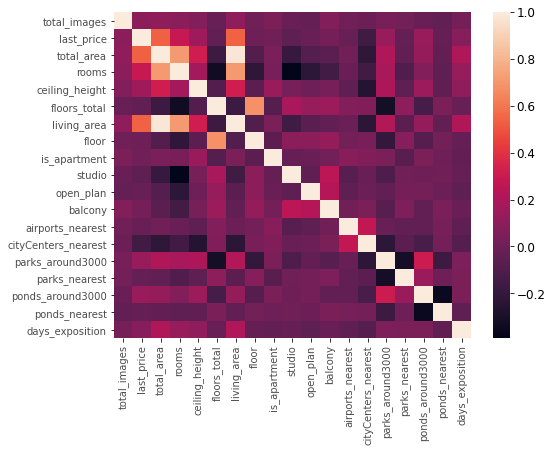

In [31]:
corr = data[data['kitchen_area'].isna()].drop('kitchen_area',axis=1).corr()
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.yticks(fontsize=10, alpha=.7)
plt.xticks(fontsize=10, alpha=.7)
plt.show()

Также оставим пропуски на местах

######  <font color='Teal'>Исправление</font>

Всё аналогично пункту выше:

In [32]:
data.corr()['kitchen_area'].sort_values(ascending=False).head()

kitchen_area     1.0
total_area       0.6
last_price       0.5
living_area      0.4
ceiling_height   0.3
Name: kitchen_area, dtype: float64

In [33]:
ratio_tk = data['total_area'].mean() / data['kitchen_area'].mean()
def fill_na_living_area(total):
    return total/ratio_tk

print('Кол-во пропусков до:',data[data['kitchen_area'].isna()].shape[0])
data['kitchen_area'].where(data['kitchen_area'].isna()!=True,
                          data['total_area'].apply(fill_na_living_area),
                         inplace=True)
print('Кол-во пропусков после:',data[data['kitchen_area'].isna()].shape[0])

Кол-во пропусков до: 2231
Кол-во пропусков после: 0


***
##### locality_name

Посмотрим на данные с пропусками

In [34]:
data[data['locality_name'].isna()].sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21276,0,"17,122,148.0",178.3,2017-02-10T00:00:00,1,2.6,3,101.8,1,False,False,False,41.6,1,NaN,"60,195.0","41,294.0",0.0,nan,0.0,nan,4.0
10122,5,"8,200,000.0",83.0,2015-06-24T00:00:00,4,2.6,5,53.0,2,False,False,False,10.0,0,NaN,"25,771.0","4,474.0",2.0,374.0,0.0,nan,364.0
17764,9,"8,400,000.0",94.0,2016-01-24T00:00:00,3,2.6,23,52.0,5,False,False,False,16.5,0,NaN,"36,865.0","10,976.0",0.0,nan,1.0,856.0,305.0
13690,7,"3,500,000.0",71.0,2016-06-23T00:00:00,3,2.8,2,45.6,1,False,False,False,8.0,2,NaN,"20,234.0","23,659.0",0.0,nan,2.0,296.0,92.0
6765,20,"4,895,892.0",60.7,2015-03-12T00:00:00,2,2.6,24,31.9,3,False,False,False,12.2,0,NaN,"22,041.0","17,369.0",0.0,nan,1.0,374.0,468.0


Вроде ничего особеного. Как заполнить эти пропуски не совсем понятно, но их очень мало (39 шт). Поэтому можно оставить, можно удалить. Я пока что оставлю. Позже посмотрим подробнее этот столбец

***
##### airports_nearest

Оценим с помощью корр матрицы

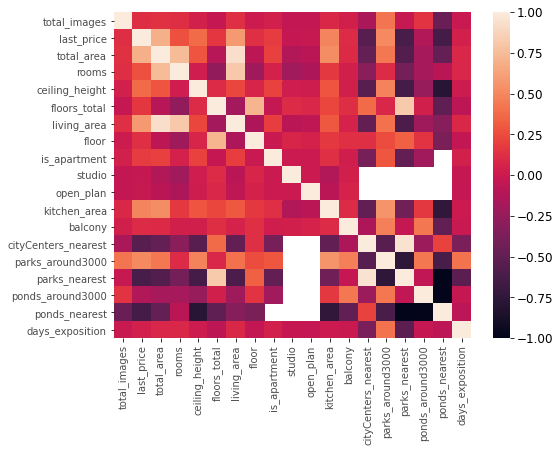

In [35]:
corr = data[data['airports_nearest'].isna()].drop('airports_nearest',axis=1).corr()
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.yticks(fontsize=10, alpha=.7)
plt.xticks(fontsize=10, alpha=.7)
plt.show()

Посмотрим, что же это за белые пятна для колонок **studio** и **open_plan**

In [36]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,2.6,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.0
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,2.6,27,15.4,26,False,False,False,8.8,0,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.0
12,10,"3,890,000.0",54.0,2016-06-30T00:00:00,2,2.6,5,30.0,5,False,False,False,9.0,0,Сертолово,nan,nan,nan,nan,nan,nan,90.0
22,20,"5,000,000.0",58.0,2017-04-24T00:00:00,2,2.8,25,30.0,15,False,False,False,11.0,2,деревня Кудрово,nan,nan,nan,nan,nan,nan,60.0
30,12,"2,200,000.0",32.8,2018-02-19T00:00:00,1,2.6,9,18.7,2,False,False,False,5.7,0,Коммунар,nan,nan,nan,nan,nan,nan,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,"2,100,000.0",62.8,2018-09-18T00:00:00,4,2.5,5,45.5,3,False,False,False,5.5,0,посёлок Дзержинского,nan,nan,nan,nan,nan,nan,nan
23692,2,"1,350,000.0",30.0,2017-07-07T00:00:00,1,2.6,5,17.5,4,False,False,False,6.0,0,Тихвин,nan,nan,nan,nan,nan,nan,413.0
23695,14,"3,100,000.0",59.0,2018-01-15T00:00:00,3,2.6,5,38.0,4,False,False,False,8.5,0,Тосно,nan,nan,nan,nan,nan,nan,45.0
23696,18,"2,500,000.0",56.7,2018-02-11T00:00:00,2,2.6,3,29.7,1,False,False,False,9.9,0,село Рождествено,nan,nan,nan,nan,nan,nan,nan


Видимо это тоже пропущенные данные. Причем скорее всего это из-за того, что маленьких городах не бывает аэропортов, парков или квартир-студий. Проверим:

In [37]:
data[data['airports_nearest'].isna()]['locality_name'].value_counts()

посёлок Мурино                    520
Всеволожск                        398
Гатчина                           307
деревня Кудрово                   299
Выборг                            237
                                 ... 
поселок Ромашки                     1
поселок Усть-Луга                   1
деревня Пчева                       1
посёлок Форт Красная Горка          1
посёлок городского типа Рябово      1
Name: locality_name, Length: 344, dtype: int64

Гипотеза верна. Оставим пропуски без изменений. А значения колонки **locality_name** оставим на потом (категорирование)

***
#####  Оставшиеся пропуски

Для поставленных задач следующие данные не нужны, поэтому оставим пропуски без изменений в этих колонках 
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000

<font color='blue'>К тому же надежно запонить пропуски в них вряд ли получится.

***
#### 2.2. Проверка числовых значений в оставшихся колонках

In [38]:
data[columns_list_without_na].sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,floor,studio,open_plan
6287,11,"12,800,000.0",115.0,2019-01-22T00:00:00,3,3,False,False
22531,10,"8,000,000.0",72.7,2018-02-02T00:00:00,3,4,False,False
2698,5,"2,800,000.0",40.0,2016-12-15T00:00:00,1,12,False,False
15239,13,"5,900,000.0",53.8,2017-05-11T00:00:00,2,6,False,False
1159,5,"3,290,000.0",40.0,2017-12-19T00:00:00,1,2,False,False


Построим **boxplot'ы** только для числовых столбцов

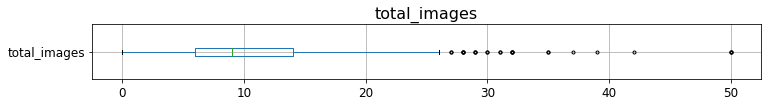

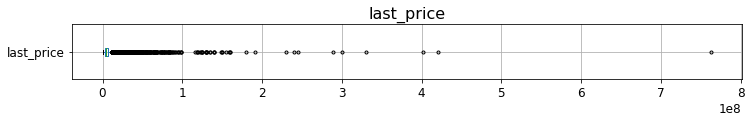

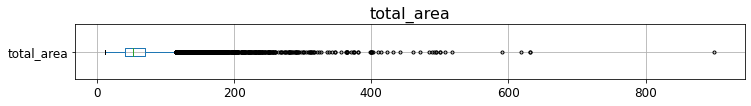

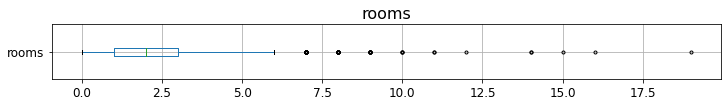

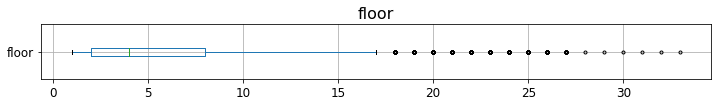

In [39]:
numerical_columns = [c for c in data[columns_list_without_na].columns if data[c].dtype.name in ['int64','float64']]
for column in numerical_columns:
    data.boxplot(column, vert=False, figsize=(12,1),sym='.')
    plt.title(column)
    plt.show()

Немного вызывают подозрения данные **last_price** и **total_area**, проверяем крайние значения

In [40]:
# самые дорогие
data.sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,"763,000,000.0",400.0,2017-09-30T00:00:00,7,2.6,10,250.0,10,False,False,False,70.0,2,Санкт-Петербург,"25,108.0","3,956.0",1.0,530.0,3.0,756.0,33.0
19540,8,"420,000,000.0",900.0,2017-12-06T00:00:00,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,"30,706.0","7,877.0",0.0,nan,2.0,318.0,106.0
14706,15,"401,300,000.0",401.0,2016-02-20T00:00:00,5,2.6,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,"21,912.0","2,389.0",1.0,545.0,1.0,478.0,393.0
1436,19,"330,000,000.0",190.0,2018-04-04T00:00:00,3,3.5,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,"23,011.0","1,197.0",3.0,519.0,3.0,285.0,233.0
15651,20,"300,000,000.0",618.0,2017-12-18T00:00:00,7,3.4,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,"32,440.0","5,297.0",0.0,nan,2.0,198.0,111.0


In [41]:
# самые дешевые
data.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,"12,190.0",109.0,2019-03-20T00:00:00,2,2.8,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,"36,421.0","9,176.0",1.0,805.0,0.0,nan,8.0
17456,7,"430,000.0",30.4,2019-04-22T00:00:00,1,2.6,2,16.0,1,False,False,False,6.0,0,Сланцы,nan,nan,nan,nan,nan,nan,nan
14911,5,"430,000.0",54.0,2018-06-26T00:00:00,2,2.6,3,30.8,3,False,False,False,9.5,0,посёлок станции Свирь,nan,nan,nan,nan,nan,nan,44.0
16274,18,"440,000.0",40.0,2018-07-10T00:00:00,1,2.6,5,22.8,1,False,False,False,7.0,0,деревня Старополье,nan,nan,nan,nan,nan,nan,45.0
17676,0,"450,000.0",36.5,2018-02-01T00:00:00,1,2.6,5,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,nan,nan,nan,nan,nan,nan,120.0


Очевидно, что запись №8793 нужно умножить на 1000

In [42]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price']*1000

In [43]:
# самые большие
data.sort_values(by='total_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,"420,000,000.0",900.0,2017-12-06T00:00:00,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,"30,706.0","7,877.0",0.0,nan,2.0,318.0,106.0
12859,20,"140,000,000.0",631.2,2019-04-09T00:00:00,7,3.9,4,322.3,4,False,False,False,19.5,1,Санкт-Петербург,"25,707.0","4,972.0",0.0,nan,2.0,210.0,nan
3117,19,"140,000,000.0",631.0,2019-03-30T00:00:00,7,2.6,5,360.4,5,False,False,False,60.0,0,Санкт-Петербург,"25,707.0","4,972.0",0.0,nan,2.0,210.0,nan
15651,20,"300,000,000.0",618.0,2017-12-18T00:00:00,7,3.4,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,"32,440.0","5,297.0",0.0,nan,2.0,198.0,111.0
5358,20,"65,000,000.0",590.0,2019-02-14T00:00:00,15,3.5,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,"24,447.0","4,666.0",1.0,767.0,0.0,nan,14.0


In [44]:
# самые маленькие
data.sort_values(by='total_area').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,"2,400,000.0",12.0,2017-07-19T00:00:00,1,2.5,5,10.0,2,False,False,False,2.1,0,Санкт-Петербург,"21,314.0",964.0,1.0,886.0,2.0,45.0,200.0
19546,3,"1,850,000.0",13.0,2019-03-11T00:00:00,1,3.4,5,7.4,2,False,False,False,2.3,0,Санкт-Петербург,"24,915.0","5,483.0",1.0,644.0,0.0,nan,24.0
19807,0,"3,800,000.0",13.0,2018-07-04T00:00:00,1,2.6,5,10.0,3,False,False,False,2.3,0,Санкт-Петербург,"21,302.0","1,242.0",1.0,592.0,3.0,27.0,9.0
17961,3,"1,400,000.0",13.0,2017-12-03T00:00:00,1,2.6,9,7.4,1,False,False,False,2.3,0,Санкт-Петербург,"14,350.0","15,945.0",0.0,nan,1.0,185.0,410.0
19558,2,"1,686,000.0",13.2,2018-12-17T00:00:00,1,2.6,5,7.5,1,False,False,False,2.3,0,Санкт-Петербург,"19,891.0","4,165.0",1.0,361.0,1.0,155.0,19.0


#####  Вывод по **last_price** и **total_area**
Большое число значиний за верхним пределом межквартильного интервала может говорить о том, что цены на "элитное" жилье лежат далеко за пределами нормального ценообразования. Эти данные аномальны, но всё же вполне могут существовать.

***
#### 2.3. Обработка first_day_exposition

Приведем эту колонку к типу **datetime**

In [45]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим на выбросы

In [46]:
data['first_day_exposition'].describe()

<ipython-input-46-13566cf36cff>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['first_day_exposition'].describe()


count                   23613
unique                   1489
top       2018-02-01 00:00:00
freq                      366
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Всё ОК

***
#### 2.4 locality_name

Оценим значения

In [47]:
data['locality_name'].value_counts().head()

Санкт-Петербург    15651
посёлок Мурино       520
посёлок Шушары       439
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

In [48]:
len(data['locality_name'].unique())

365

Что-то тут точно не правильно... Не дни в году же считаем, а населённые пункты рядом с СПб. Да и слова "посёлок" тут лишние. Напишем функцию, которая оставит только слова, начинающиеся с Большой буквы.

In [49]:
def name_with_up_letter(string):
    out = []
    for word in string.split():
        if word[0].isupper():
            out.append(word)
    return ' '.join(out)

<font color='green'>Отличный ход!

In [50]:
data['locality_name'].apply(lambda x: name_with_up_letter(str(x))).value_counts().head()

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Name: locality_name, dtype: int64

In [51]:
len(data['locality_name'].apply(lambda x: name_with_up_letter(str(x))).unique())

306

Сохраним в новом столбце полученные строки

In [52]:
data['name'] = data['locality_name'].apply(lambda x: name_with_up_letter(str(x)))

***
#### Проверка

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

***
#### Вывод по предобработке
- обработаны явные пропуски
- пропуски неявные оставлены без изменений
- найдены и обработаны выбросы
- заменен тип данных, где это было необходимо
- добавлена колонка с корректными названиями населенных пунктов

<font color='green'>Итак, в целом предобработка удалась, применены верные методы, пропуски обработаны с опорой на прочие имеющиеся параметры, данные приведены к удобным типам. 

### Шаг 3. Посчитайте и добавьте в таблицу

***
#### 3.1. Цена квадратного метра
Для расчета необходимы колонки **last_price** и **total_area**

In [54]:
data['square_meter_price'] = data['last_price'] / data['total_area']

***
#### 3.2. День недели, месяц, год
Добавим колонку **day_of_weak** используя метод *isoweekday* типа *datetime*. 1 - понедельник, 2 - вторник и т.д.

<font color='blue'>День слабых? ;)

<font color='Teal'>На самом деле я дальний родственник "Миталия Вутко" ;) </font>

<font color='Teal'>Начну следующий проект примерно так:
>Let me speak from my heart </font>

<font color='Teal'>Исправил далее </font>

In [55]:
data['day_of_week'] = data['first_day_exposition'].apply(lambda date: date.isoweekday())

Аналогично для месяца и года

In [56]:
data['month'] = data['first_day_exposition'].apply(lambda date: date.month)
data['year'] = data['first_day_exposition'].apply(lambda date: date.year)

***
#### 3.3. Этаж квартиры
Необходимо определить первый, последний или другой этажи. Напишем для этого функцию, на вход которой будем подавать списки с номером этажа и общим количеством этажей

In [57]:
def floor_string(list_floor):
    if list_floor[0]==1:
        return 'первый этаж'
    elif list_floor[0]==list_floor[1]:
        return 'последний этаж'
    else:
        return 'другой этаж'

Добавим новую колонку

In [58]:
# заменил в следующем блоке кода
# data['floor_string'] = data[['floor', 'floors_total']].apply(floor_string, axis=1)

<font color=blue>**Челендж**: сделать категоризацию по типу этажа методом `where()`. Встроенные методы всегда быстрее собственных функций, что важно для больших сетов.  Сперва можно присвоить всем этажам статус "другой", а затем еще в две строки последовательно поменять его исходя из наших условий.    

<font color='Teal'>Вызов принят))

In [59]:
data['floor_string'] = 'Другой'
data['floor_string'].where(data['floor']!=data['floors_total'],
                          'Последний',
                          inplace=True)
data['floor_string'].where(data['floor'] != 1,
                          'Первый',
                          inplace=True)
# проверка
data['floor_string'].value_counts()

Другой       17363
Последний     3336
Первый        2914
Name: floor_string, dtype: int64

<b>UPD: <font color='green'>Вот, теперь ты готов обрабатывать сеты с мллионом строк ;)

***
#### 3.3. Cоотношения жилой и кухонной к общей площади
Добавим соответствующие столбцы в таблицу, при этом, учитывая пропуски в **kitchen_area** и **living_area**

In [60]:
data['kitchen_total_ratio'] = data['kitchen_area'].fillna(0) / data['total_area']
data['living_total_ratio'] = data['living_area'].fillna(0) / data['total_area']

#### Вывод
Добавили в датафрейм данные, необходимые для проведения дальнейших исследований

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

<font color=green>Дополнительные параметры рассчитаны успешно, можно приступать к анализу.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

***
####  Площадь, цена, число комнат, высота потолков
Построим для этих параметров гистограммы

Для площади возьмем диапазон до 99,9 перцентиля, для наглядности

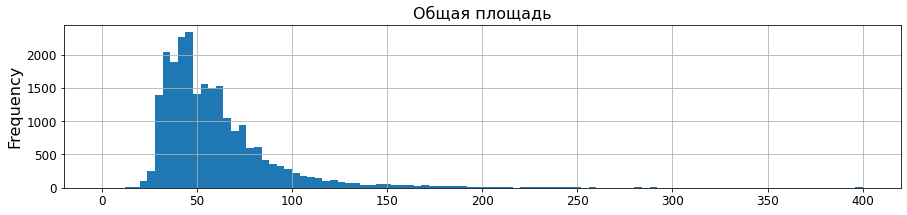

In [62]:
data['total_area'].plot(kind='hist',
                        bins=100,
                        range=(0,data['total_area'].quantile(0.999)),
                        figsize=(15,3),
                        grid=True,
                        title='Общая площадь')
plt.show()

Для цены возьмем диапазон до 99 перцентиля, для наглядности

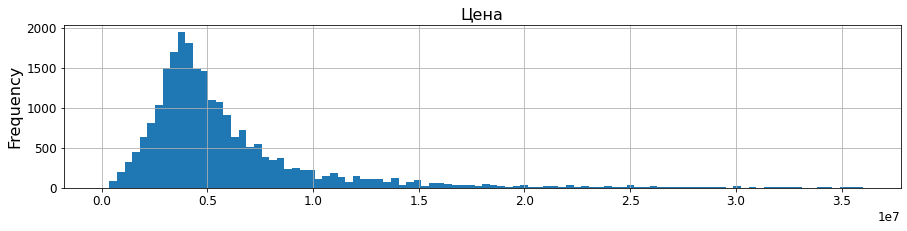

In [63]:
data['last_price'].plot(kind='hist',
                        bins=100,
                        range=(0,data['last_price'].quantile(0.99)),
                        figsize=(15,3),
                        grid=True,
                        title='Цена')
plt.show()

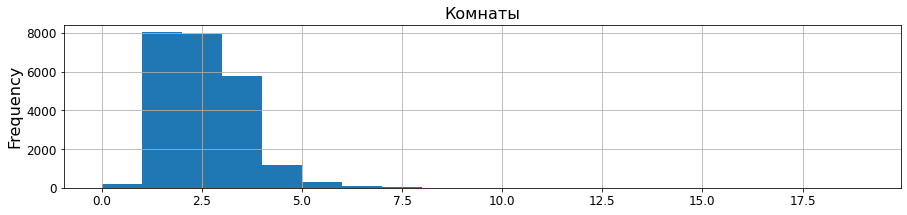

In [64]:
data['rooms'].plot(kind='hist',
                   bins=data['rooms'].max(),
                   figsize=(15,3),
                   grid=True,
                   title='Комнаты')
plt.show()

Для высоты потолков возьмем диапазон от 0,1 до 99,9 перцентиля, для наглядности

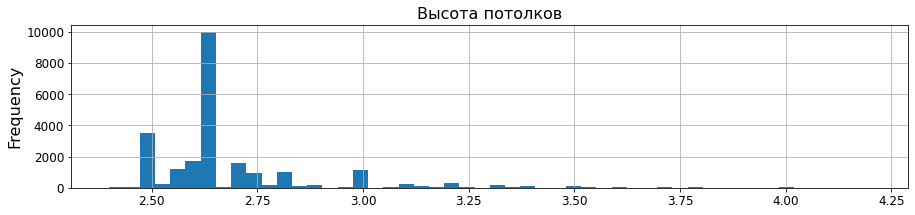

In [65]:
data['ceiling_height'].plot(kind='hist',
                            bins=50,
                            range=(data['ceiling_height'].quantile(0.001),data['ceiling_height'].quantile(0.999)),
                            figsize=(15,3),
                            grid=True,
                            title='Высота потолков')
plt.show()

<font color=green>Классно отмасштабировал!

#### Вывод по значениям: площадь, цена, число комнат, высота потолков
- За пределами выведенных графиков имеются аномальные значения. Но, как говорилось ранее, на этапе предобработки, они вполне возможны в реальной жизни. Поэтому для наглядности были ограничены диапазоны.

<s><font color='brown'>Давай попробуем сделать еще какие-то выводы по этим (очень информативным) графикам, кроме нахождения выбросов.

<font color='Teal'>Дополнительно:
    <p> - подавляющая доля рынка недвижимости лежит в диапазонах 30-100 кв.метра, 2-10 млн. р., 2-4 комнаты и высотой 2.5-2.6 метров</p>
    <p> - чаще всего продают недвижимость ~45 кв.метров, ~4 млн. р., 2 комнаты и 2.6 метров</p>
    <p> - у всех предсавленных данных достаточно длинный хвост</p>


<b>UPD: <font color='green'>Отлично, именно то, что я хотел увидеть.

***
#### Время продажи квартиры
Оценим имеющиеся значения

In [66]:
data['days_exposition'].describe()

count   20,441.0
mean       180.9
std        219.7
min          1.0
25%         45.0
50%         95.0
75%        232.0
max      1,580.0
Name: days_exposition, dtype: float64

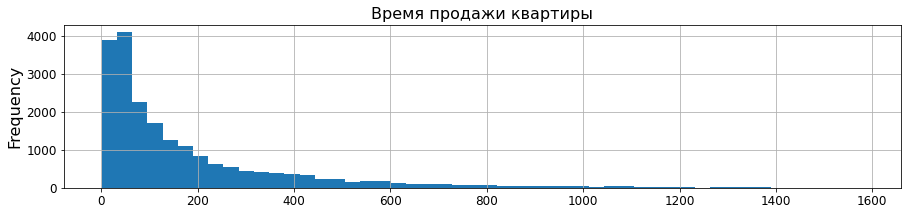

In [67]:
data['days_exposition'].plot(kind='hist',
                            bins=50,figsize=(15,3),
                            grid=True,
                            title='Время продажи квартиры')
plt.show()

<font color='blue'>Давай посмотрим эту гистограмму на масштабе до 200 дней на 100 корзин. Видим ли мы что-то необычное?

<font color='Teal'>Смотрим

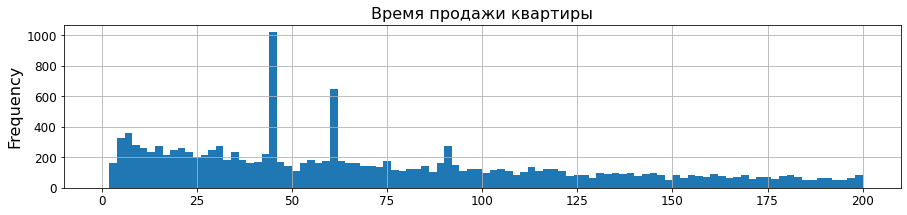

In [68]:
data['days_exposition'].plot(kind='hist',
                            bins=100,figsize=(15,3),
                            range=(0,200),
                            grid=True,
                            title='Время продажи квартиры')
plt.show()

<font color='Teal'>Очень необычные всплески для 45 и 60 суток.
    <p> Можно попробовать выяснить с чем это связано у того, кто предоставил эти данные, возможно это какие-то особенности работы автоматизированной системы

<b>UPD: <font color='blue'>На 45й и 60й день, в зависимости от типа объявления, на сервисе происходит автоматическая деактивация объявлений. Можно как вариант не рассматривать эти строки,как несостоявшиеся сделки.

In [69]:
print('Если время продажи квартиры меньше {:.0f} суток, то ты попал в 10% самых быстрых'
      .format(data['days_exposition'].quantile(0.1)))
print('Если время продажи квартиры больше {:.0f} суток, то ты попал в 10% самых долгих'
      .format(data['days_exposition'].quantile(0.9)))

Если время продажи квартиры меньше 17 суток, то ты попал в 10% самых быстрых
Если время продажи квартиры больше 460 суток, то ты попал в 10% самых долгих


#### Вывод по времени продажи квартиры
- среднее время продажи приблизительно 181 сутки, при этом 50% квартир продается за 45 суток
- 10% самых быстрых продаж происходит менее чем за 17 суток
- 10% самых долгих продаж происходит более чем за 460 суток
- время продажи квартиры соответствует распределению Пуассона $p(k) \equiv \mathbb{P}(Y=k) = \frac{\lambda^k}{k!}\, e^{-\lambda}$

<font color='blue'>Единственное, не стоит наызывать все подобные распределения Пуассоновскими. Распределение Пуассона имеет совсем другую природу, оно отвечает за частоту событий в единицу времени. График здесь может разве что *напоминать* данное распределение. 

***
#### Редкие и выбивающиеся значения
Необходимо избавится от значений, искажающих наши исследования. Сохраним в новом датафрейме только данные из интервала (0.5,99.5) перцентилей для **total_area** и **last_price**

In [70]:
boundaries_up = data[['total_area','last_price']].quantile(0.995)
boundaries_down = data[['total_area','last_price']].quantile(0.005) 

data_clear = data[(data.total_area > boundaries_down.total_area)&
    (data.total_area < boundaries_up.total_area)&
    (data.last_price > boundaries_down.last_price)&
    (data.last_price < boundaries_up.last_price)]
print('Отброшено {:.0f} записей, осталось {:.2%} данных'.format(data.shape[0]-data_clear.shape[0],
                                                       data_clear.shape[0]/data.shape[0]))

Отброшено 425 записей, осталось 98.20% данных


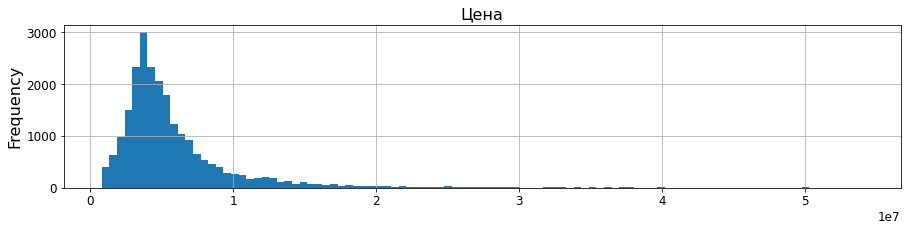

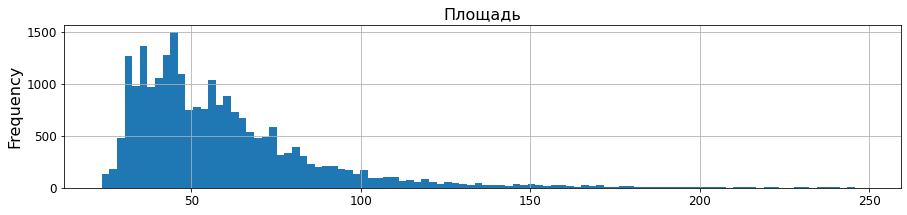

In [71]:
data_clear['last_price'].plot(kind='hist',
                        bins=100,
                        figsize=(15,3),
                        grid=True,
                        title='Цена')
plt.show()
data_clear['total_area'].plot(kind='hist',
                        bins=100,
                        figsize=(15,3),
                        grid=True,
                        title='Площадь')
plt.show()

#### Вывод по редким и выбивающимся значениям
- Удаленные значения вполне могут существовать в реальной жизни, но для исследования они не подходят, т.к. могут искажать общую картину
- 98.20% позволяют увидеть гистограммы распределений в реальном масштабе, без использования границ

<font color='green'>От выбросов избавились. Молодец, что оцениваешь количество оставшихся данных.

#### Факторы больше всего влияющие на стоимость квартиры

С помошью корреляционной матрицы оценим зависимость **last_price** с другими параметрами

In [72]:
corr = data_clear.corr()
corr.sort_values(by='last_price',ascending=False)['last_price']

last_price             1.0
total_area             0.8
square_meter_price     0.7
living_area            0.7
kitchen_area           0.6
rooms                  0.5
ceiling_height         0.4
ponds_around3000       0.2
parks_around3000       0.2
total_images           0.1
days_exposition        0.1
floor                  0.1
is_apartment           0.0
floors_total           0.0
balcony                0.0
living_total_ratio     0.0
parks_nearest          0.0
month                  0.0
day_of_week           -0.0
open_plan             -0.0
airports_nearest      -0.0
studio                -0.0
year                  -0.0
kitchen_total_ratio   -0.1
ponds_nearest         -0.1
cityCenters_nearest   -0.3
Name: last_price, dtype: float64

- чем больше значения **total_area, square_meter_price, living_area, kitchen_area, rooms и ceiling_height**, тем выше цена квартиры (сильная зависимоть)
- чем больше расстояние до центра, тем меньше цена квартиры (слабая зависимость)

<font color='green'>Матрица корреляции построена, зависимости определены.

<font color='blue'>Единственное, по зависимости от расстояния стоит добавить, что она обратная.

<font color='Teal'> Больше расстояние до центра, тем меньше цена квартиры = обратная зависимость

Оценим зависимость цены (по оси Y) от параметров `interest_columns` (по оси X)

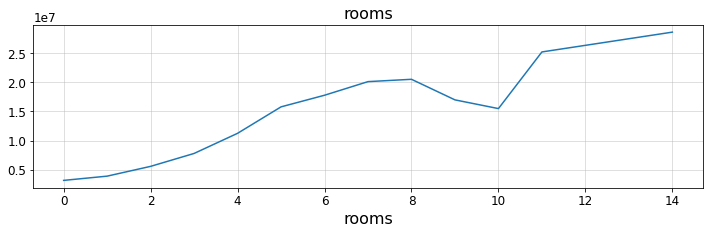

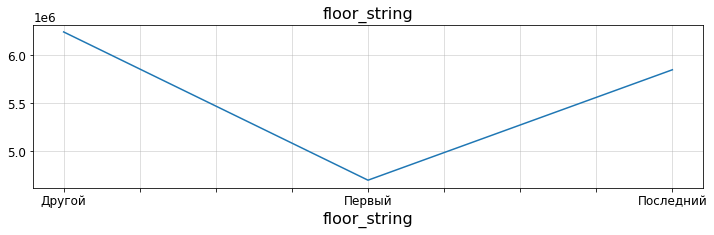

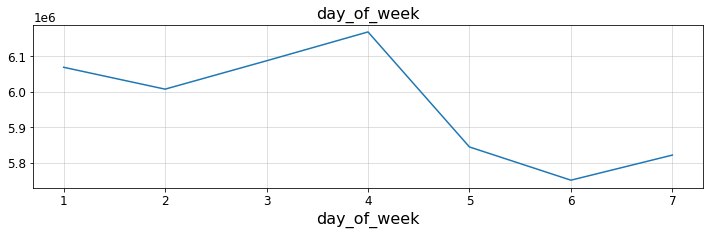

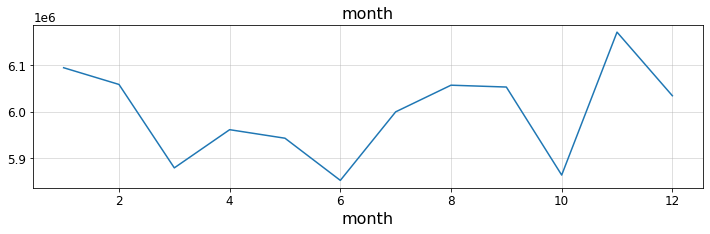

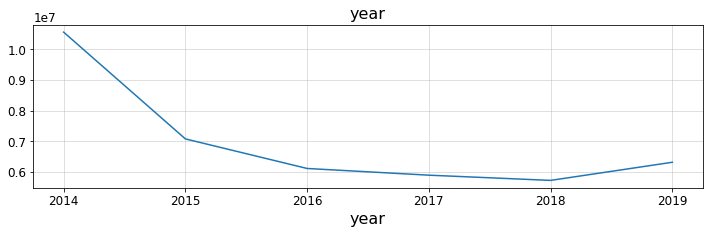

In [73]:
interest_columns = ['rooms',
                    'floor_string',
                    'day_of_week',
                    'month',
                    'year',]

for column in interest_columns:
    df = data_clear.groupby(column)['last_price'].mean()
    
    df.plot(figsize=(12,3))
    plt.title(column, fontsize=16)
    plt.grid(axis='both', alpha=.5)

    plt.show()
    print()
    

Оценим зависимость параметров `interest_columns` (по оси Y) от цены (по оси X)

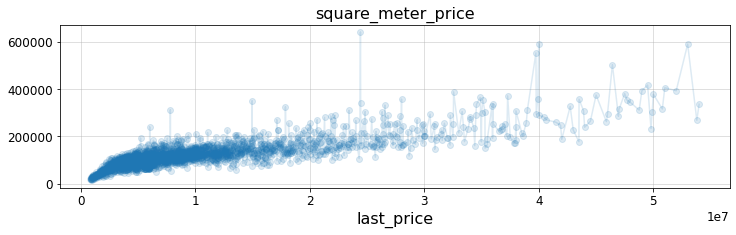

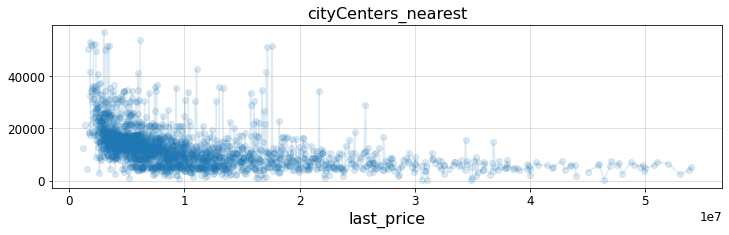

In [74]:
interest_columns = ['square_meter_price',
                    'cityCenters_nearest',
                   ]
for column in interest_columns:
    df = data_clear.groupby('last_price')[column].mean()

    df.plot(figsize=(12,3),alpha=0.15,style='o-')
    plt.title(column, fontsize=16)
    plt.grid(axis='both', alpha=.5)

    plt.show()
    print()

<font color='green'>Итак, замечательный графический анализ зависимостей. Отличная автоматизация циклом.

По данным графикам прослеживаются следующие зависимости:
- цена растет с числом комнат
- цена последнего этажа больше, чем первого
- недвижимость, выложенная на продажу с ПНД по ЧТВ обычно дороже
- недвижимость, выложенная на продажу в марте, июне или октябре дешевле
- с 2016 по 2018 цены падали, а в 2019 цены немного выросли
- чем больше цена за кв. метр, тем больше общая стоимоть недвижимости
- чем ближе к центру города, тем больше общая стоимоть недвижимости

<font color='green'>По этому пункту вопросов нет асолютно (крайне редкий случай).

#### Населённые пункты с самой высокой и низкой стоимостью жилья

In [75]:
top10 = [*data_clear['name'].value_counts().head(10).index]
(data_clear
    .query('name in @top10')
    .groupby('name')['square_meter_price']
    .mean()
    .sort_values(ascending=False)
)

name
Санкт-Петербург   112,394.9
Пушкин            103,085.9
Кудрово            94,975.6
Парголово          90,175.9
Мурино             85,703.3
Шушары             78,251.2
Колпино            75,239.6
Гатчина            68,746.1
Всеволожск         68,701.9
Выборг             58,185.7
Name: square_meter_price, dtype: float64

Стоимость квадратного метра в Санкт-Петербурге почти в **2 раза** больше, чем в Выборге

<font color='green'>Здесь все верно.

#### Какая область входит в центр Санкт-Петербурга
- выделяем в новый DataFrame данные без пропусков только по СПб
- преобразуем расстояние до центра в `км`

In [76]:
data_SPb = data_clear[(data_clear['name'] == 'Санкт-Петербург')&(data_clear['cityCenters_nearest'].isna()!= True)][:]
data_SPb['cityCenters_nearest'] = round(data_SPb['cityCenters_nearest']/1000)

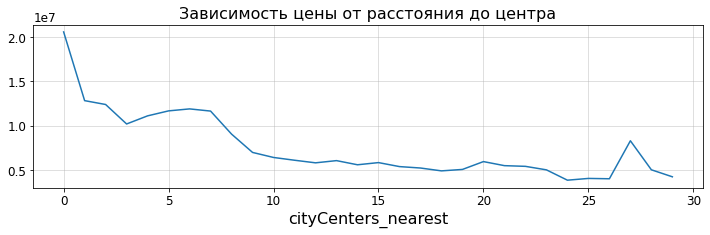

In [77]:
data_SPb.groupby('cityCenters_nearest')['last_price'].mean().plot(figsize=(12,3))

plt.title('Зависимость цены от расстояния до центра', fontsize=16)
plt.grid(axis='both', alpha=.5)

plt.show()

На расстоянии менее 9-10 км цены значительно выше. Соответственно радиус центральной зоны составляет примерно 10 км

<font color='brown'>Согласись, 10 км - уже на порядок дешевле,то есть это не центр. Возможно,стоит немного сузить зону.

<font color='Teal'>Ограничим зону 7 километрами

#### Сегмент квартир в центре
Разделим недвижимость в центре и на окраине

In [78]:
def is_centr(x):
    if x <= 7:
        return 'Центр'
    else:
        return 'Окраина'

data_SPb['is_centr'] = data_SPb['cityCenters_nearest'].apply(is_centr)




Оценим зависимости прощади, цены и кол-ва комнат от колонки **is_centr**

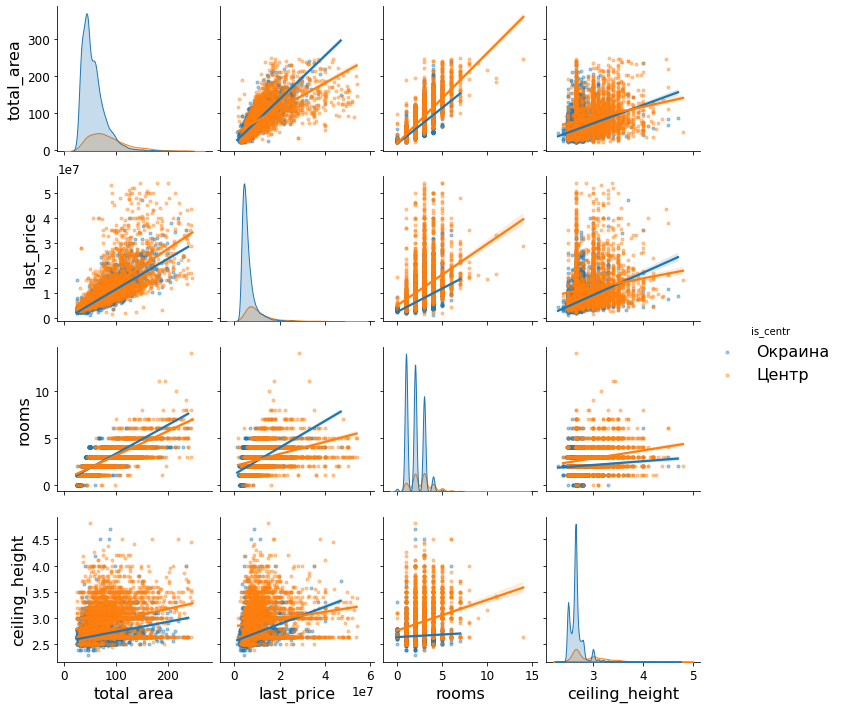

In [79]:
columns=['total_area','last_price','rooms','is_centr','ceiling_height']

sns.pairplot(data_SPb[columns],
             kind="reg",
             hue="is_centr",
             markers=".",
             plot_kws={'scatter_kws': {'alpha': 0.4}})

plt.show()

Вывод (графики под диагональю + сама диагональ):
- 1 строка (Площадь):
    - в центре недвижимость больше по площади
- 2 строка (Цена):
    - чем больше площадь, тем больше цена, причем в центре зависимость сильнее
    - в ценре больше дорого жилья
- 3 строка (Комнаты):
    - чем больше площадь, тем больше количество комнат, при этом в центре зависимость слабее
    - чем больше цена, тем больше комнат, причем в центре зависимость слабее
    - в центре больше недвижимости с большим кол-вом комнат, а на окраине с больше 1-2 комнатных квартир
- 4 строка (высота потолков):
    - чем больше площадь, тем больше высота потолка, причем в центре зависимоть сильнее
    - чем больше цена, тем больше высота потолков, причем в центре и на окраине примерно одинаковая зависимость
    - чем больше комнат, тем выше потолки в центре, а на окраине кол-во комнат не влияет на высоту потолка
    - в центре потолки обычно выше, а на окраине много недвижимости с высотой потолка 2.5-2.6 метра

Оценим зависимость стоимости от площади, высоты потолков,кол-ва комнат, этажа, удаленности (в км) и даты публикации для цетра и окраины (**is_centr**)

<font color='Teal'>Добавил именование осей графиков

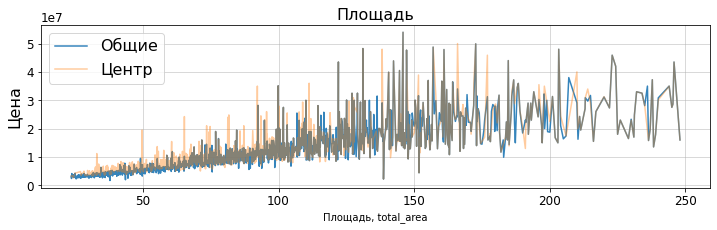

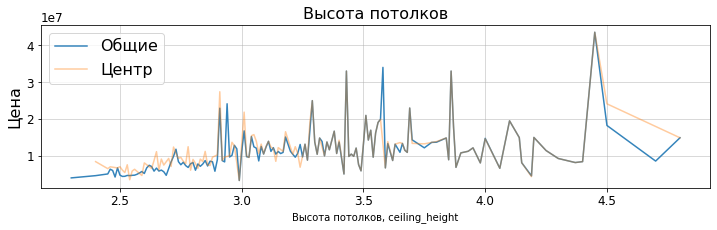

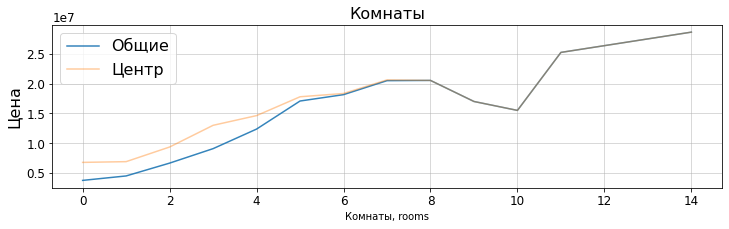

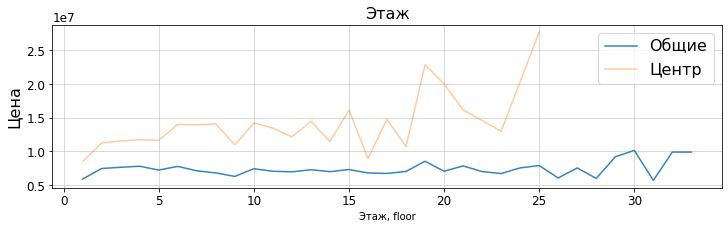

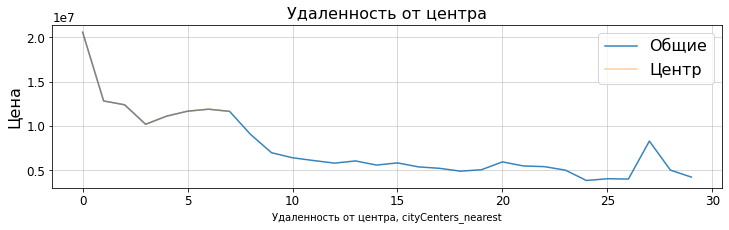

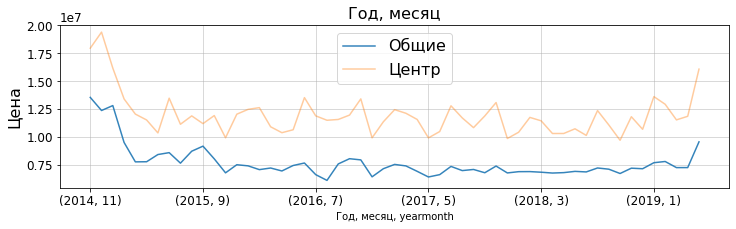

In [80]:
interest_columns = {'Площадь':'total_area',
                    'Высота потолков':'ceiling_height',
                    'Комнаты':'rooms',
                    'Этаж':'floor',
                    'Удаленность от центра':'cityCenters_nearest',
                    'Год, месяц':['year','month']}

for (name, column) in interest_columns.items():
    # Общие
    df = data_SPb.groupby(column)['last_price'].mean()
    df.plot(figsize=(12,3), alpha=.9)
    plt.grid(axis='both', alpha=.5)
    # Центр
    df = data_SPb[data_SPb['is_centr']=='Центр'].groupby(column)['last_price'].mean()
    df.plot(figsize=(12,3), alpha=.4)
    plt.title(name, fontsize=16)
    plt.grid(axis='both', alpha=.6)
    plt.legend(['Общие','Центр'])
    plt.xlabel(name + ', ' + ''.join(column), fontsize=10)
    plt.ylabel('Цена')
    plt.show()
    print()

<s><font color='red'>Все наглядно, но нужно обязательно подписать оси графиков, чтоы было понятно, какая величина у нас на каждой оси.

<font color='Teal'> Исправил

<b>UPD: <font color='green'>Отлично, теперь все понятно с первого взгляда.

Вывод:
- недвижимость в центре дороже, чем по городу если:
    - площадь менее 125 м2
    - высота потолков менее 3 м
    - количество комнат менее 6 шт
- недвижимость в центре дороже, независимо от этажа
- недвижимость в центре дороже, независимо от даты

<font color='green'>Очень тщательный анализ центра и сравнение его со всем городом. 


### Шаг 5. Общий вывод

Было сделано:
- Предобработка:
	- в представленных данных имеется небольшое число необрабатываемых пропусков и выбросов, которые были отброшены
	- остальные пропуски и выбросы были заменены на подходящие значения по смыслу
	- дата размещения объявления преобразована в необходимый формат
	- данные с названием города были обработаны, с целью убрать неявные дубликаты
- Добавлены в таблицу 
	- стоимость кв. метра
	- день, месяц, год
	- категория жилья в зависимотсти от этажа
	- соотношения жилой и кухонной площади к общей
- Исследовательский анализ:
	- больше всего объявлений со стоимостью около 4 млн., площадью 40-50 м2, 2-4 комнатами и высотой потолков 2.5 или 2.6 метра
	- время продажи недвижимости соответствует распределению Пуассона (10 процентиль = 17 суток, медиана = 180 суток, 90 процентиль = 460 суток)
	- аномальные данные были убраны из данных для конечных расчетов
	- проанализирована зависимость цены от:
		- количества комнат
		- категории жилья по этажу
		- дня недели, когда размещено объявление
		- месяца, когда размещено объявление
		- года, когда размещено объявление
		- цены квадратного метра
		- удаленности от центра
	- выявлены населенные пункты с самыми высокими ценами за квадратный метр
	- по графикам определен радиус цетральной зоны
	- отдельно проанализирована цетральная зона СПб
***
Исходя из представленных данных рыночная стоимость объектов недвижимости больше всего зависит от площади(общей, жилой или кухонной), количества комнат, расстояния до центра, населенного пункта и стоимости квадратного метра. При этом на стоимость жилья так же могут влиять другие параметры, не представленные в датасете, например транспортная доступность, социальные объекты и др.

Были выявлены неочевидные зависимости стоимости, например:
- недвижимость, выложенная на продажу с ПНД по ЧТВ обычно дороже
- недвижимость, выложенная на продажу в марте, июне или октябре дешевле
До конца не понятно, почему так произошло, предположу, что в рабочие дни больше объявлений от риелторских агенств по завышенной цене, а выходные дни объявления размещают частные продавцы.

Также хочется отметить, что цены на недвижимость в центре Санкт-Петербурга значительно выше, чем цены на окраине, что вполне логично. При этом недвижимость в центре отличается и по другим значениям, что связано скорее всего с историческим аспектом

<font color='green'>Вывод содержит описание всех результатов проведенного анализа и дает ответы на поставленные в задании вопросы о зависимости цены от прочих факторов. Хорошо.

<font color=green>С оформлением у нас также все отлично: структура проекта соблюдена, комментарии аккуратны и в подходящих ячейках. Код читабелен и откомментирован.

---
<font color='blue'>Итак, отличная работа, могу только похвалить. Ты показываешь прекрасное владение изучаемым материалом: умеешь очищать и обогощать данные, строишь хорошие графики, понимаешь и используешь понятие корреляции. Грамотно строишь срезы. Отдельно похвалю хорошую автоматизацию вывода графиков и прочей информации.  
    Однако у меня нашлось несколько замечаний, уверен, поработать над ними будет полезно и не составит для тебя труда. Буду ждать доработанный проект, успехов!  

<b>UPD <font color='blue'>Ожидаемо, ты отлично справился с доработкой. С удовольствием принимаю проект. Успехов в изучении статистики!

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x] "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод